# IMPORT 
Import library yang diperlukan:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Mengimport dataset dari excel 'bank-additional.xlsx'.

In [2]:
data = pd.read_excel('bank-additional.xlsx')

Menampilan head dataset:

In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92893,-46.2,1313,1900-07-30 11:01:00,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,01:01:00,93994,-36.4,4855,5191,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,01:04:00,94465,-41.8,4962,1900-08-04 20:01:00,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,01:04:00,94465,-41.8,4959,1900-08-04 20:01:00,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,1900-01-03 21:02:00,-42.0,4191,1900-08-03 11:08:00,no


Menampilkan jumlah dan dimensi dataset:

In [4]:
data.shape

(4119, 21)

---

# DATA ANALYSIS DAN VISUALISASI DATA

Menampilkan informasi tipe data dan missing value:

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   object 
 16  cons.price.idx  4119 non-null   object 
 17  cons.conf.idx   4119 non-null   f

Terlihat pada dataset tidak ada missing value. Namun missing value akan diperiksa lebih lanjut.

In [6]:
numerical = list(data.select_dtypes(include=['int64']).columns.values) + list(data.select_dtypes(include=['float64']).columns.values)
categorical = list(data.select_dtypes(include=['object']))

In [7]:
print('Tipe numerical:','\n', numerical)
print('\n')
print('Tipe categorical:','\n', categorical)

Tipe numerical: 
 ['age', 'duration', 'campaign', 'pdays', 'previous', 'cons.conf.idx']


Tipe categorical: 
 ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'euribor3m', 'nr.employed', 'y']


Jika melihat penjelasan dataset, seharusnya kolom 'emp.var.rate', 'cons.price.idx', 'euribor3m', dan 'nr.employed' termasuk numerical.
Oleh karena itu, perlu diubah dahulu menjadi numeric.

In [8]:
numeric = ['emp.var.rate','cons.price.idx','euribor3m','nr.employed']
for col in numeric:
    data[col] = pd.to_numeric(data[col], errors='coerce')

In [9]:
numerical = numerical + numeric

In [10]:
data[numerical].describe()

,age,duration,campaign,pdays,previous,cons.conf.idx,emp.var.rate,cons.price.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,1735.000000,3733.000000,3898.000000,758.0
mean,40.113620,256.788055,2.537266,960.422190,0.190337,-40.499102,-1.590893,93618.966515,3352.500785,5191.0
std,10.313362,254.703736,2.568159,191.922786,0.541788,4.594578,0.959394,594.900642,2008.073121,0.0
min,18.000000,0.000000,1.000000,0.000000,0.000000,-50.800000,-3.400000,92201.000000,0.044444,5191.0
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-42.700000,-1.800000,93075.000000,1299.000000,5191.0
50%,38.000000,181.000000,2.000000,999.000000,0.000000,-41.800000,-1.800000,93918.000000,4857.000000,5191.0
75%,47.000000,317.000000,3.000000,999.000000,0.000000,-36.400000,-1.100000,93994.000000,4961.000000,5191.0
max,88.000000,3643.000000,35.000000,999.000000,6.000000,-26.900000,-0.100000,94767.000000,5045.000000,5191.0


----

Visualisasi data untuk melihat distribusi umur nasabah dan non-nasabah

# DATA CLEANING

Perlu dicaritahu lebih dahulu apakah ada missng data atau tidak.

In [11]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [12]:
for col in data.columns:
    if data[col].dtype == 'object':
        print(col, data[col].nunique())

job 12
marital 4
education 8
default 3
housing 3
loan 3
contact 2
month 10
day_of_week 5
poutcome 3
y 2


In [13]:
data.isnull().sum()

age                  0
job                  0
marital              0
education            0
default              0
housing              0
loan                 0
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate      2384
cons.price.idx     386
cons.conf.idx        0
euribor3m          221
nr.employed       3361
y                    0
dtype: int64

Masih ada nilai 'NaN' yang harus diisi dengan suatu nilai. Kita akan isi 'NaN' dengan nilai mean.

In [14]:
data_NaN = ['emp.var.rate','cons.price.idx','euribor3m','nr.employed']

for col in data_NaN:
    data[col] = data[col].fillna(data[col].mean())

In [15]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Semua 'NaN' telah diisi dengan nilai mean dari masing-masing kolom.

---

# DATA VISUALIZATION

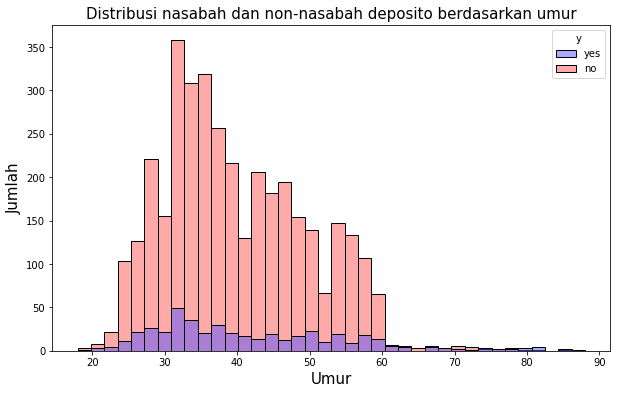

Remark:
Grafik di atas menunjukan distribusi nasabah dan non-nasabah berdasarkan umur. Terlihat nasabah deposito didominasi umur produktif. Klien pada rentang umur 30-40 tahun cukup banyak


In [16]:
plt.figure(figsize=(10,6))

hue_order = ['yes','no']
sns.histplot(data=data, x=data['age'],
             multiple='layer',hue=data['y'],hue_order=hue_order, palette='seismic')

plt.title('Distribusi nasabah dan non-nasabah deposito berdasarkan umur',fontsize=15)
plt.xlabel('Umur', fontsize=15)
plt.ylabel('Jumlah', fontsize=15)
plt.show()

print('Remark:')
print('Grafik di atas menunjukan distribusi nasabah dan non-nasabah berdasarkan umur. Terlihat nasabah deposito didominasi umur produktif. Klien pada rentang umur 30-40 tahun cukup banyak')



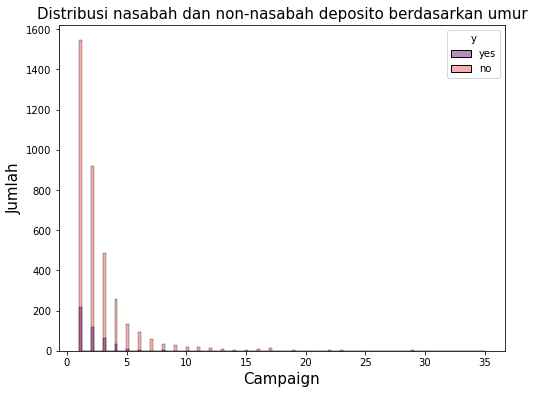

Remark:
Dengan semakin besar campaign, maka semakin besar juga potensi calon klien menjadi nasabah deposito


In [17]:
plt.figure(figsize=(8,6))

hue_order = ['yes','no']
sns.histplot(data=data, x=data['campaign'],
             multiple='layer',hue=data['y'],hue_order=hue_order, palette='magma')

plt.title('Distribusi nasabah dan non-nasabah deposito berdasarkan umur',fontsize=15)
plt.xlabel('Campaign', fontsize=15)
plt.ylabel('Jumlah', fontsize=15)
plt.show()

print('Remark:')
print('Dengan semakin besar campaign, maka semakin besar juga potensi calon klien menjadi nasabah deposito')

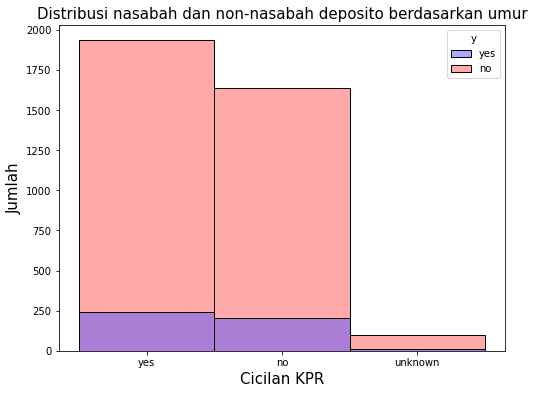

Remark:
Dari grafik diatas, cicilan KPR tidak terlalu mempengaruhi klien untuk menjadi nasabah deposito atau tidak.


In [18]:
plt.figure(figsize=(8,6))

hue_order = ['yes','no']
sns.histplot(data=data, x=data['housing'],
             multiple='layer',hue=data['y'],hue_order=hue_order,palette='seismic')

plt.title('Distribusi nasabah dan non-nasabah deposito berdasarkan umur',fontsize=15)
plt.xlabel('Cicilan KPR', fontsize=15)
plt.ylabel('Jumlah', fontsize=15)
plt.show()

print('Remark:')
print('Dari grafik diatas, cicilan KPR tidak terlalu mempengaruhi klien untuk menjadi nasabah deposito atau tidak.')

# DATA PREPROCESING

Encoding data categorical:

In [19]:
from sklearn .preprocessing import LabelEncoder

le = LabelEncoder()

for col in data.columns:
    if data[col].dtype == 'object':
        data[col]=le.fit_transform(data[col])

Scaling data set:

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = data.drop(['y'],axis=1)
y = data['y']

data = scaler.fit_transform(X)

Split dataset menjadi data train dan data test:

In [21]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# MODEL

In [22]:
#LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(max_iter=300,solver='liblinear')

LR.fit(x_train,y_train)
y_pred_LR = LR.predict(x_test)

In [23]:
#KNN

from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=1)

KNN.fit(x_train,y_train)
y_pred_KNN = KNN.predict(x_test)

In [24]:
#SVM

from sklearn.svm import SVC

SVM = SVC(max_iter=2000)

SVM.fit(x_train,y_train)
y_pred_SVM = SVM.predict(x_test)

In [25]:
#Naive Bayes

from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()

NB.fit(x_train,y_train)
y_pred_NB = NB.predict(x_test)

In [26]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()

DT.fit(x_train,y_train)
y_pred_DT = DT.predict(x_test)

In [27]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(n_estimators=200)

RFC.fit(x_train,y_train)
y_pred_RFC = RFC.predict(x_test)

# RESULT

In [28]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

SCORE / ACCURACY

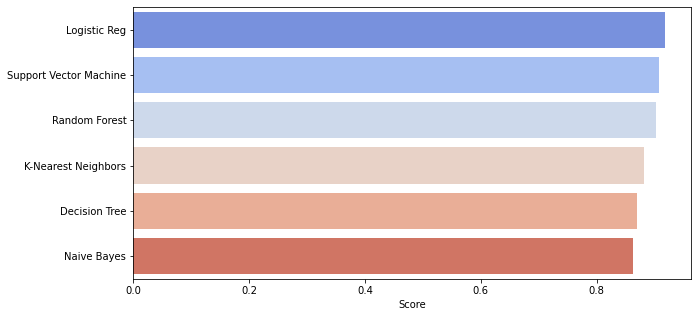

Score Tertinggi =  0.917


,Score
Logistic Reg,0.917476
Support Vector Machine,0.907767
Random Forest,0.902913
K-Nearest Neighbors,0.882282
Decision Tree,0.868932
Naive Bayes,0.862864


In [29]:
LR = accuracy_score(y_test, y_pred_LR)
KNN = accuracy_score(y_test, y_pred_KNN)
SVM = accuracy_score(y_test, y_pred_SVM)
NB = accuracy_score(y_test, y_pred_NB)
DT = accuracy_score(y_test, y_pred_DT)
RFC = accuracy_score(y_test, y_pred_RFC)

score = pd.DataFrame([[LR],[KNN],[SVM],[NB],[DT],[RFC]],
                     index=['Logistic Reg','K-Nearest Neighbors','Support Vector Machine','Naive Bayes','Decision Tree','Random Forest'])
score.columns = ['Score']

score = score.sort_values(by=['Score'],axis=0,ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(y=score.index,x=score['Score'],palette='coolwarm',order=score.index)
plt.show()

max = round(score.max(0)[0],ndigits=3)
print('Score Tertinggi = ', max)
score

In [30]:
max = score.max(0).values
print('Score Terbesar = ', max)

Score Terbesar =  [0.91747573]


CLASSIFICATION REPORT & CONFUSION MATRIX

In [31]:
print('Confusion Matrix Logistic Regression:',"\n")
print(confusion_matrix(y_test,y_pred_LR))

print("\n")

print('Classification Report:',"\n",
      classification_report(y_test,y_pred_LR))

Confusion Matrix Logistic Regression: 

[[724  24]
 [ 44  32]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.97      0.96       748
           1       0.57      0.42      0.48        76

    accuracy                           0.92       824
   macro avg       0.76      0.69      0.72       824
weighted avg       0.91      0.92      0.91       824



In [32]:
print('Confusion Matrix K-Nearest Neighbors:',"\n")
print(confusion_matrix(y_test,y_pred_KNN))

print("\n")

print('Classification Report:',"\n",
      classification_report(y_test,y_pred_KNN))

Confusion Matrix K-Nearest Neighbors: 

[[696  52]
 [ 45  31]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.93      0.93       748
           1       0.37      0.41      0.39        76

    accuracy                           0.88       824
   macro avg       0.66      0.67      0.66       824
weighted avg       0.89      0.88      0.88       824



In [33]:
print('Confusion Matrix Support Vector Machine:',"\n")
print(confusion_matrix(y_test,y_pred_SVM))

print("\n")

print('Classification Report:',"\n",
      classification_report(y_test,y_pred_SVM))

Confusion Matrix Support Vector Machine: 

[[748   0]
 [ 76   0]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.91      1.00      0.95       748
           1       0.00      0.00      0.00        76

    accuracy                           0.91       824
   macro avg       0.45      0.50      0.48       824
weighted avg       0.82      0.91      0.86       824



/Users/heruhermawan/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/heruhermawan/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/heruhermawan/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [34]:
print('Confusion Matrix Decision Tree:',"\n")
print(confusion_matrix(y_test,y_pred_DT))

print("\n")

print('Classification Report:',"\n",
      classification_report(y_test,y_pred_DT))

Confusion Matrix Decision Tree: 

[[679  69]
 [ 39  37]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.91      0.93       748
           1       0.35      0.49      0.41        76

    accuracy                           0.87       824
   macro avg       0.65      0.70      0.67       824
weighted avg       0.89      0.87      0.88       824



In [35]:
print('Confusion Matrix Random Forest:',"\n")
print(confusion_matrix(y_test,y_pred_RFC))

print("\n")

print('Classification Report:',"\n",
      classification_report(y_test,y_pred_RFC))

Confusion Matrix Random Forest: 

[[713  35]
 [ 45  31]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.95      0.95       748
           1       0.47      0.41      0.44        76

    accuracy                           0.90       824
   macro avg       0.71      0.68      0.69       824
weighted avg       0.90      0.90      0.90       824



In [36]:
print('Confusion Matrix Naive Bayes:',"\n")
print(confusion_matrix(y_test,y_pred_NB))

print("\n")

print('Classification Report:',"\n",
      classification_report(y_test,y_pred_NB))

Confusion Matrix Naive Bayes: 

[[673  75]
 [ 38  38]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.90      0.92       748
           1       0.34      0.50      0.40        76

    accuracy                           0.86       824
   macro avg       0.64      0.70      0.66       824
weighted avg       0.89      0.86      0.87       824



In [37]:
#from sklearn.model_selection import GridSearchCV

#param_grid = {'C': [0.1,1, 10, 100],
#              'gamma': [0.1,0.01,0.001,0.0001],
#              'kernel': ['rbf']} 

#grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=1)


#grid.fit(x_train, y_train)

#print('Best Grid Param: ',grid.best_params_)
#print('Best Grid Estimator : ',grid.best_estimator_)

#grid_pred = grid.predict(x_test)

In [38]:
#print(confusion_matrix(y_test,grid_pred))
#print(classification_report(y_test,grid_pred))
#print(accuracy_score(y_test,grid_pred))

# CONCLUSION

In [39]:
max = score.max(0)[0]
print('Score Tertinggi = ', max)

Score Tertinggi =  0.9174757281553398


Dari hasil pembuatan model di atas, Algoritma terbaik dengan score accuracy tertinggi adalah LOGISTIC REGRESSION.

Kemudian, model tersebut digunakan pada dataset "bank-additional-full.xlsx"

job 12
marital 4
education 8
default 3
housing 3
loan 3
contact 2
month 10
day_of_week 5
poutcome 3
y 2


/Users/heruhermawan/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


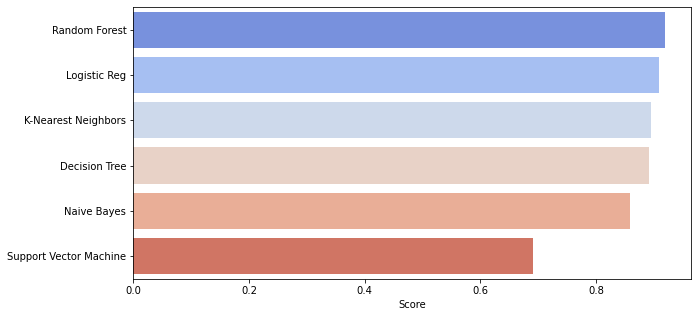

Score Tertinggi =  0.919


,Score
Random Forest,0.919034
Logistic Reg,0.909444
K-Nearest Neighbors,0.895120
Decision Tree,0.891357
Naive Bayes,0.859068
Support Vector Machine,0.690459


In [40]:
#Import dataset

data = pd.read_excel('bank-additional-full.xlsx')

numerical = list(data.select_dtypes(include=['int64']).columns.values) + list(data.select_dtypes(include=['float64']).columns.values)
categorical = list(data.select_dtypes(include=['object']))


numeric = ['emp.var.rate','cons.price.idx','euribor3m','nr.employed']
for col in numeric:
    data[col] = pd.to_numeric(data[col], errors='coerce')

numerical = numerical + numeric

for col in data.columns:
    if data[col].dtype == 'object':
        print(col, data[col].nunique())

data_NaN = ['emp.var.rate','cons.price.idx','euribor3m','nr.employed']

for col in data_NaN:
    data[col] = data[col].fillna(data[col].mean())


le = LabelEncoder()

for col in data.columns:
    if data[col].dtype == 'object':
        data[col]=le.fit_transform(data[col])

scaler = StandardScaler()

X = data.drop(['y'],axis=1)
y = data['y']

data = scaler.fit_transform(X)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

LR = LogisticRegression(max_iter=300,solver='liblinear')
LR.fit(x_train,y_train)
y_pred_LR = LR.predict(x_test)

KNN = KNeighborsClassifier(n_neighbors=1)
KNN.fit(x_train,y_train)
y_pred_KNN = KNN.predict(x_test)

SVM = SVC(max_iter=2000)
SVM.fit(x_train,y_train)
y_pred_SVM = SVM.predict(x_test)

NB = GaussianNB()
NB.fit(x_train,y_train)
y_pred_NB = NB.predict(x_test)

DT = DecisionTreeClassifier()
DT.fit(x_train,y_train)
y_pred_DT = DT.predict(x_test)

RFC = RandomForestClassifier(n_estimators=100)
RFC.fit(x_train,y_train)
y_pred_RFC = RFC.predict(x_test)

#Visualisasi

LR = accuracy_score(y_test, y_pred_LR)
KNN = accuracy_score(y_test, y_pred_KNN)
SVM = accuracy_score(y_test, y_pred_SVM)
NB = accuracy_score(y_test, y_pred_NB)
DT = accuracy_score(y_test, y_pred_DT)
RFC = accuracy_score(y_test, y_pred_RFC)

score = pd.DataFrame([[LR],[KNN],[SVM],[NB],[DT],[RFC]],
                     index=['Logistic Reg','K-Nearest Neighbors','Support Vector Machine','Naive Bayes','Decision Tree','Random Forest'])
score.columns = ['Score']

score = score.sort_values(by=['Score'],axis=0,ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(y=score.index,x=score['Score'],palette='coolwarm',order=score.index)
plt.show()

max = round(score.max(0)[0],ndigits=3)
print('Score Tertinggi = ', max)
score

In [41]:
print('Score= ', round(RFC,ndigits=3))
print('\n')
print('Confusion Matrix: ','\n', confusion_matrix(y_test, y_pred_RFC))
print('\n')
print('Classification Report: ','\n', classification_report(y_test, y_pred_RFC))

Score=  0.919


Confusion Matrix:  
 [[7078  241]
 [ 426  493]]


Classification Report:  
               precision    recall  f1-score   support

           0       0.94      0.97      0.96      7319
           1       0.67      0.54      0.60       919

    accuracy                           0.92      8238
   macro avg       0.81      0.75      0.78      8238
weighted avg       0.91      0.92      0.92      8238



Kemudian, model tersebut digunakan pada dataset "bank-full.xlsx"

/Users/heruhermawan/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


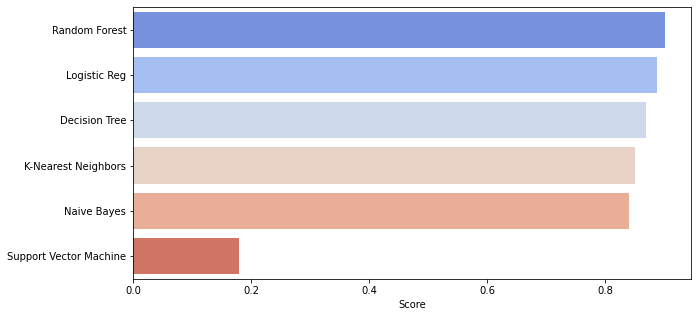

Score Tertinggi =  0.901


,Score
Random Forest,0.901250
Logistic Reg,0.888201
Decision Tree,0.868959
K-Nearest Neighbors,0.851156
Naive Bayes,0.841203
Support Vector Machine,0.179808


In [42]:
#Import dataset

data = pd.read_excel('bank-full.xlsx')

numerical = list(data.select_dtypes(include=['int64']).columns.values) + list(data.select_dtypes(include=['float64']).columns.values)
categorical = list(data.select_dtypes(include=['object']))

#numeric = ['emp.var.rate','cons.price.idx','euribor3m','nr.employed']
#for col in numeric:
#    data[col] = pd.to_numeric(data[col], errors='coerce')

#numerical = numerical + numeric

#data_NaN = ['emp.var.rate','cons.price.idx','euribor3m','nr.employed']

#for col in data_NaN:
#    data[col] = data[col].fillna(data[col].mean())


le = LabelEncoder()

for col in data.columns:
    if data[col].dtype == 'object':
        data[col]=le.fit_transform(data[col])

scaler = StandardScaler()

X = data.drop(['y'],axis=1)
y = data['y']

data = scaler.fit_transform(X)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

LR = LogisticRegression(max_iter=300,solver='liblinear')
LR.fit(x_train,y_train)
y_pred_LR = LR.predict(x_test)

KNN = KNeighborsClassifier(n_neighbors=1)
KNN.fit(x_train,y_train)
y_pred_KNN = KNN.predict(x_test)

SVM = SVC(max_iter=2000)
SVM.fit(x_train,y_train)
y_pred_SVM = SVM.predict(x_test)

NB = GaussianNB()
NB.fit(x_train,y_train)
y_pred_NB = NB.predict(x_test)

DT = DecisionTreeClassifier()
DT.fit(x_train,y_train)
y_pred_DT = DT.predict(x_test)

RFC = RandomForestClassifier(n_estimators=100)
RFC.fit(x_train,y_train)
y_pred_RFC = RFC.predict(x_test)

#Visualisasi

LR = accuracy_score(y_test, y_pred_LR)
KNN = accuracy_score(y_test, y_pred_KNN)
SVM = accuracy_score(y_test, y_pred_SVM)
NB = accuracy_score(y_test, y_pred_NB)
DT = accuracy_score(y_test, y_pred_DT)
RFC = accuracy_score(y_test, y_pred_RFC)

score = pd.DataFrame([[LR],[KNN],[SVM],[NB],[DT],[RFC]],
                     index=['Logistic Reg','K-Nearest Neighbors','Support Vector Machine','Naive Bayes','Decision Tree','Random Forest'])
score.columns = ['Score']

score = score.sort_values(by=['Score'],axis=0,ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(y=score.index,x=score['Score'],palette='coolwarm',order=score.index)
plt.show()

max = round(score.max(0)[0],ndigits=3)
print('Score Tertinggi = ', max)
score

In [43]:
data = pd.read_excel('bank-full.xlsx')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [44]:
print('Score= ', round(RFC,ndigits=3))
print('\n')
print('Confusion Matrix: ','\n', confusion_matrix(y_test, y_pred_RFC))
print('\n')
print('Classification Report: ','\n', classification_report(y_test, y_pred_RFC))

Score=  0.901


Confusion Matrix:  
 [[7699  281]
 [ 612  451]]


Classification Report:  
               precision    recall  f1-score   support

           0       0.93      0.96      0.95      7980
           1       0.62      0.42      0.50      1063

    accuracy                           0.90      9043
   macro avg       0.77      0.69      0.72      9043
weighted avg       0.89      0.90      0.89      9043



Hasil model algoritma masih sangat baik